##Tüm Ön İşleme Yöntemleri####

##Belirtilen klasördeki tüm görüntüleri işler. Her aşamada farklı filtreleri uygular ve çıktıları görselleştirir. Her adımın çıktısını bir sonraki adıma beslemez, ancak tüm işlemleri bağımsız olarak uygular ve karşılaştırır.

Processing steps for image: ID_0b9c158b0.png
Normalizasyon Adımları:


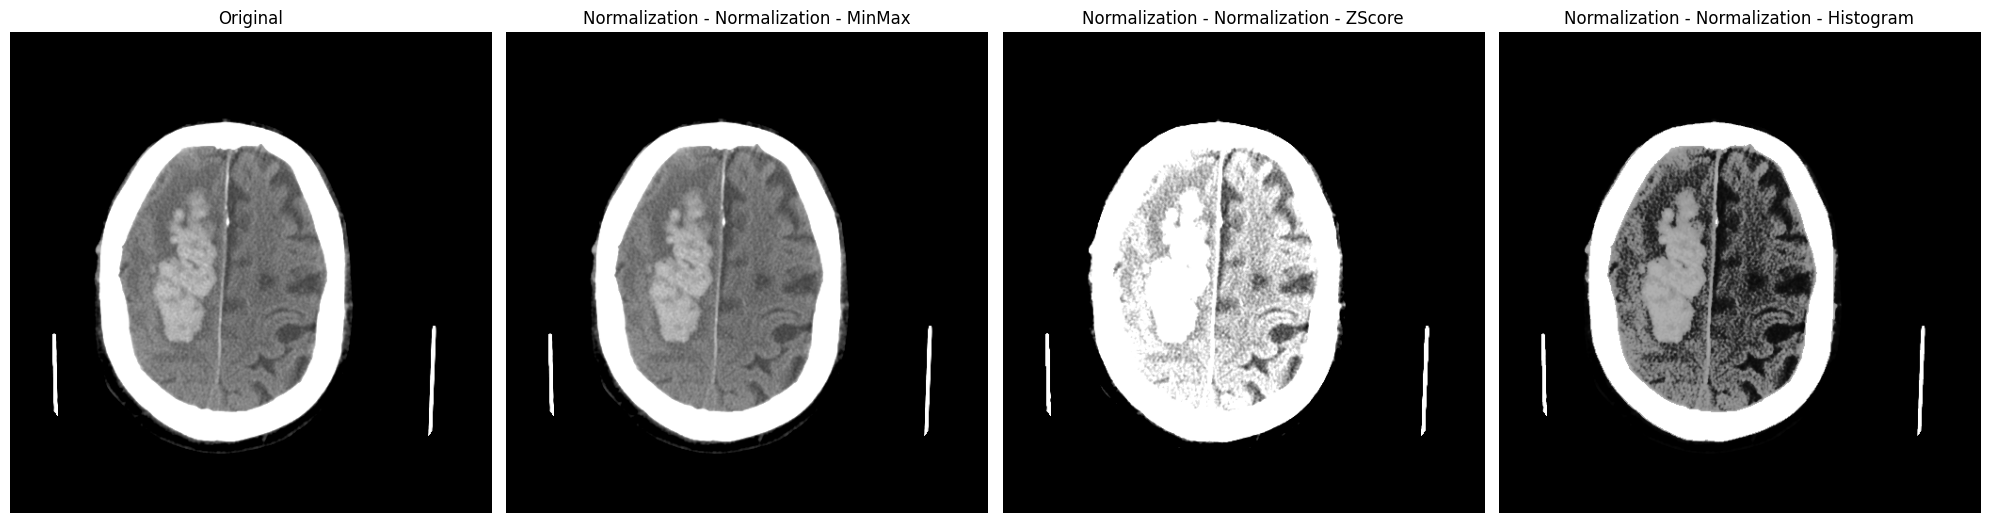

Gürültü Giderme Adımları:


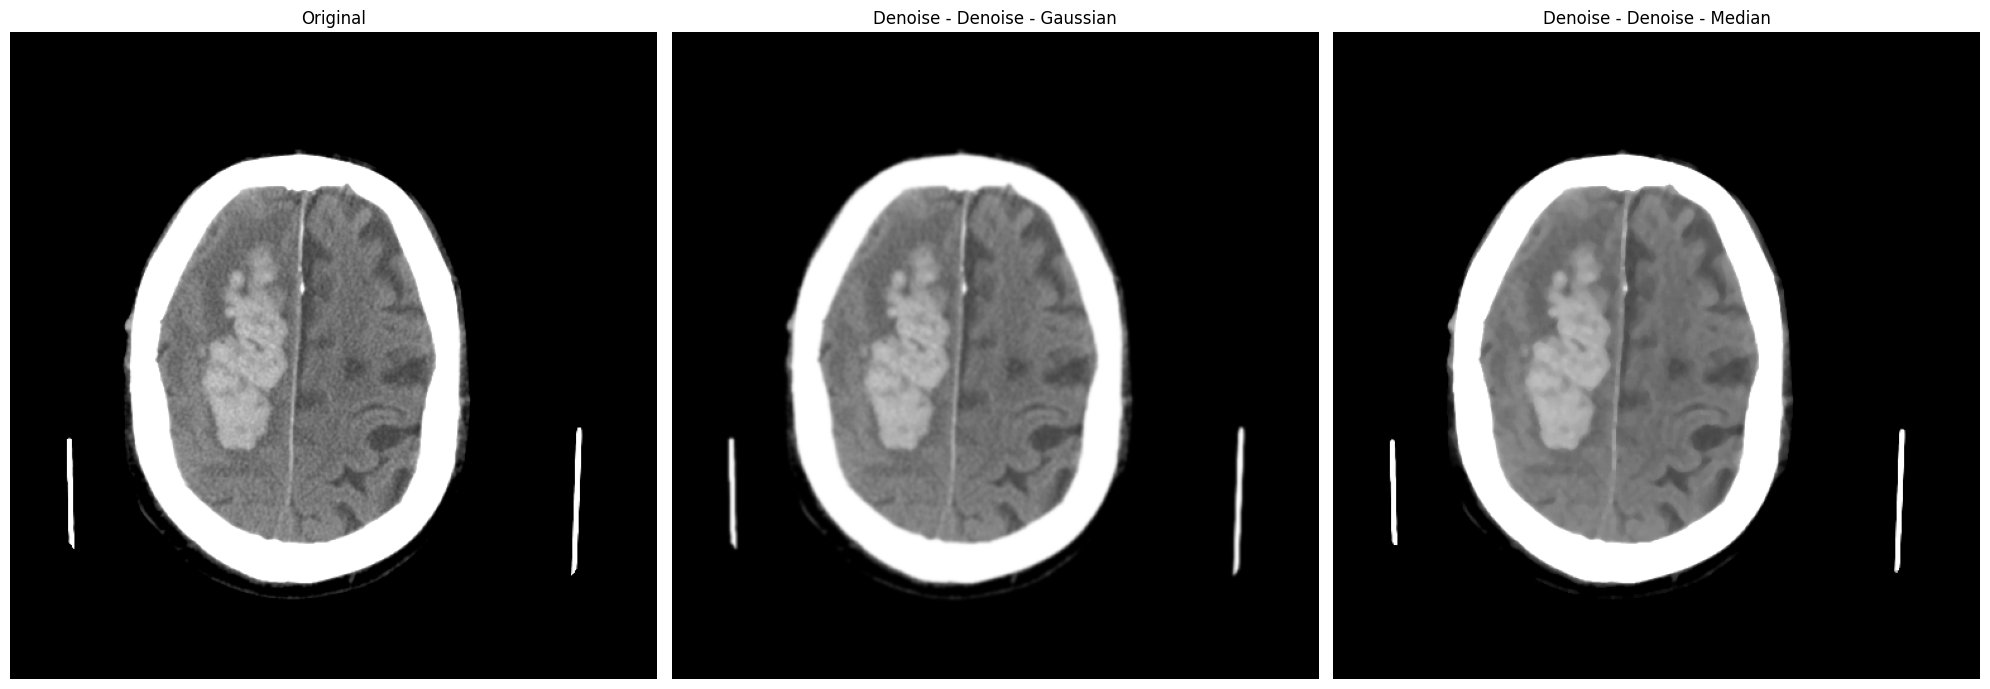

Yumuşatma Adımları:


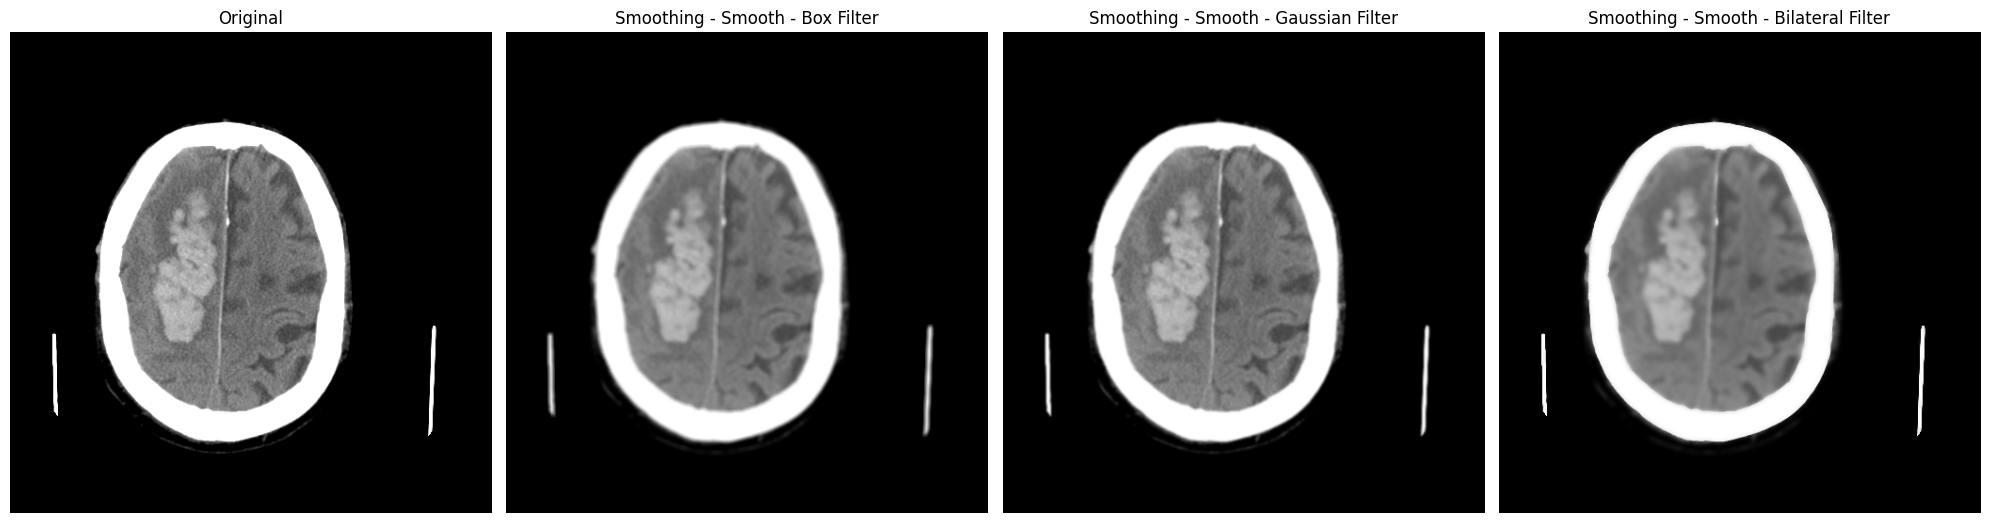

Keskinleştirme Adımları:


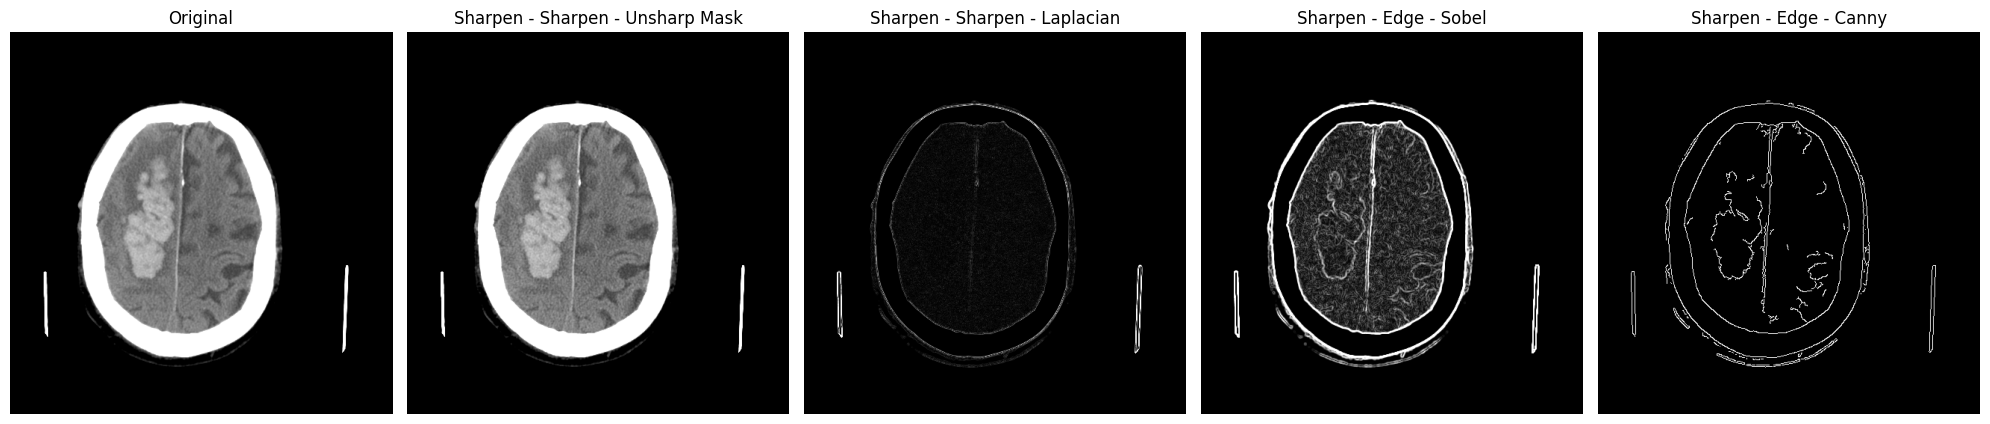

Dönüşüm Adımları:


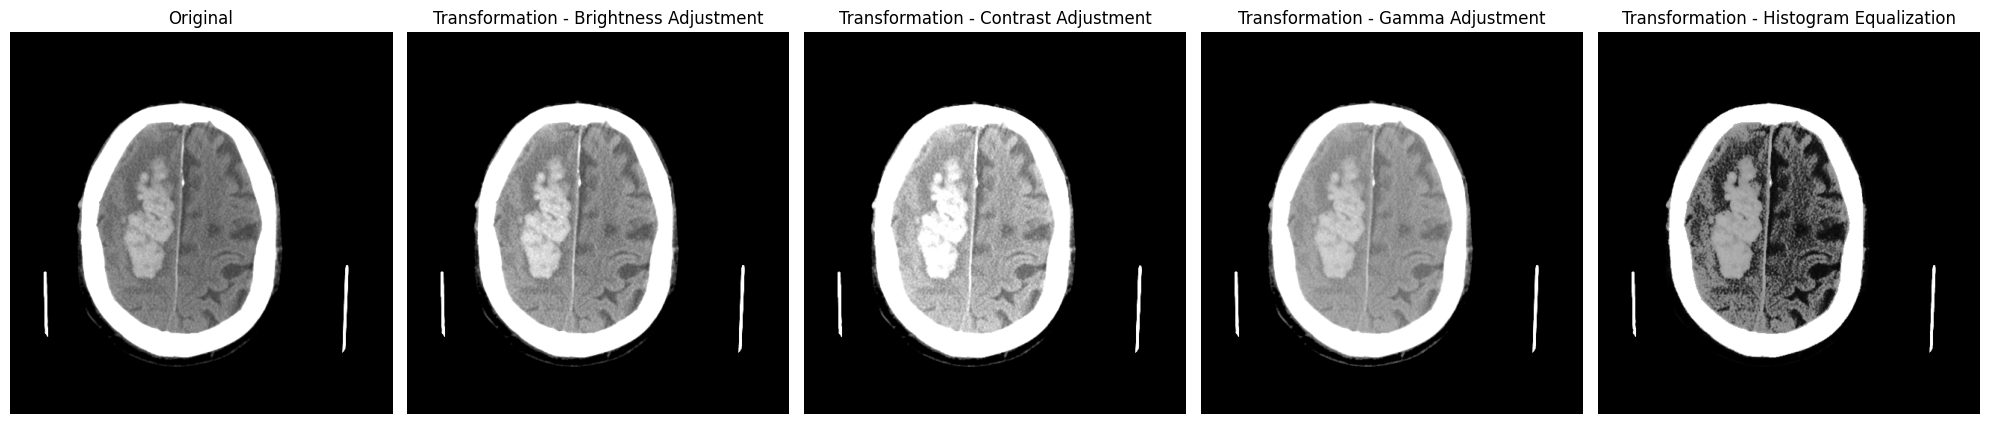

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Normalizasyon Fonksiyonları
def normalize_minmax(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def normalize_zscore(image):
    mean, std = cv2.meanStdDev(image)
    zscore_normalized = (image - mean[0][0]) / (std[0][0] + 1e-8)
    return np.clip(zscore_normalized * 255, 0, 255).astype(np.uint8)

def normalize_histogram(image):
    return cv2.equalizeHist(image)

# Gürültü Giderme Fonksiyonları
def denoise_gaussian(image):
    return cv2.GaussianBlur(image, (5, 5), sigmaX=1)

def denoise_median(image):
    return cv2.medianBlur(image, 5)

# Yumuşatma Fonksiyonları
def smooth_box(image):
    return cv2.blur(image, (5, 5))

def smooth_gaussian(image):
    return cv2.GaussianBlur(image, (5, 5), sigmaX=1)

def smooth_bilateral(image):
    return cv2.bilateralFilter(image, 9, 75, 75)

# Keskinleştirme Fonksiyonları
def sharpen_unsharp(image):
    blurred = cv2.GaussianBlur(image, (5, 5), sigmaX=1)
    return cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

def sharpen_laplacian(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian)

def edge_sobel(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    return cv2.convertScaleAbs(sobel)

def edge_canny(image):
    return cv2.Canny(image, 100, 200)

# Dönüşüm Fonksiyonları
def adjust_brightness(image, factor=1.2):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

def adjust_contrast(image, factor=1.5):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

def adjust_gamma(image, gamma=1.5):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

# Görselleştirme Fonksiyonu
def display_processing_steps(image, steps, title_prefix):
    plt.figure(figsize=(20, 10))

    # Orijinal Görüntü
    plt.subplot(1, len(steps) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # İşlenmiş Adımlar
    for i, (step_name, processed_image) in enumerate(steps):
        plt.subplot(1, len(steps) + 1, i + 2)
        plt.imshow(processed_image, cmap='gray')
        plt.title(f"{title_prefix} - {step_name}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# İşlem Adımları
def main():
    """
    Görüntü üzerinde tüm normalizasyon, keskinleştirme, gürültü giderme, yumuşatma ve dönüşüm adımlarını uygular.
    Her adımın çıktısını gösterir.
    """
    # Girdi Görüntüleri
    input_folder = "/content/deneme"
    if not os.path.exists(input_folder):
        print("Input folder 'original' not found! Please create the folder and add images.")
        return

    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]
    if len(image_files) == 0:
        print("No images found in the 'original' folder.")
        return

    # Tüm Görüntüleri İşleme
    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Normalizasyon Adımları
        normalization_steps = [
            ("Normalization - MinMax", normalize_minmax(image)),
            ("Normalization - ZScore", normalize_zscore(image)),
            ("Normalization - Histogram", normalize_histogram(image))
        ]

        # Gürültü Giderme Adımları
        denoising_steps = [
            ("Denoise - Gaussian", denoise_gaussian(image)),
            ("Denoise - Median", denoise_median(image))
        ]

        # Yumuşatma Adımları
        smoothing_steps = [
            ("Smooth - Box Filter", smooth_box(image)),
            ("Smooth - Gaussian Filter", smooth_gaussian(image)),
            ("Smooth - Bilateral Filter", smooth_bilateral(image))
        ]

        # Keskinleştirme Adımları
        sharpening_steps = [
            ("Sharpen - Unsharp Mask", sharpen_unsharp(image)),
            ("Sharpen - Laplacian", sharpen_laplacian(image)),
            ("Edge - Sobel", edge_sobel(image)),
            ("Edge - Canny", edge_canny(image))
        ]

        # Dönüşüm Adımları
        transformation_steps = [
            ("Brightness Adjustment", adjust_brightness(image)),
            ("Contrast Adjustment", adjust_contrast(image)),
            ("Gamma Adjustment", adjust_gamma(image)),
            ("Histogram Equalization", normalize_histogram(image))
        ]

        # Tüm Adımları Görselleştir
        print(f"Processing steps for image: {image_file}")

        print("Normalizasyon Adımları:")
        display_processing_steps(image, normalization_steps, "Normalization")

        print("Gürültü Giderme Adımları:")
        display_processing_steps(image, denoising_steps, "Denoise")

        print("Yumuşatma Adımları:")
        display_processing_steps(image, smoothing_steps, "Smoothing")

        print("Keskinleştirme Adımları:")
        display_processing_steps(image, sharpening_steps, "Sharpen")

        print("Dönüşüm Adımları:")
        display_processing_steps(image, transformation_steps, "Transformation")

if __name__ == "__main__":
    main()

In [ ]:
!pip install brisque

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 7.7 MB/s eta 0:00:00
  Created wheel for libsvm-official: filename=libsvm_official-3.35.0-cp311-cp311-linux_x86_64.whl size=124214 sha256=42a1917ed598d880bd19a852ba0ac34b90d6b53f0773785588ed96aee9fe9956
  Stored in directory: /root/.cache/pip/wheels/cb/1b/c2/e2bf699257a3150a4c54c95e6efe70586ea1a4d97e71619076
Successfully built libsvm-official


In [ ]:
!pip install brisque  # Install the brisque package

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from brisque import BRISQUE  # Now you can import BRISQUE without errors
import time

# ... (Rest of your code remains the same)

In [ ]:
!pip install pybrisque opencv-python opencv-contrib-python
!apt-get install libopencv-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install piq torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 4.2 MB/s eta 0:00:00


##Bir görüntünün BRISQUE skorunu hesaplayarak görüntü kalitesini değerlendirmeye yarar. BRISQUE, herhangi bir referans görüntüye ihtiyaç duymadan görüntünün kalitesini belirleyen bir metriktir.

In [ ]:
import torch
import torchvision.transforms as transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
from piq import brisque

def calculate_brisque(image):
    """BRISQUE skorunu hesaplayan fonksiyon"""
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)  # 4D tensor (Batch, C, H, W)
    score = brisque(image_tensor)
    return score.item()

def evaluate_pipeline(image, title):
    """Pipeline sonuçlarını hesaplayıp skorlayan fonksiyon"""
    score = calculate_brisque(image)
    print(f"{title} - BRISQUE Skoru: {score:.2f}")
    return score


##OLUŞTURULAN PİPELİNE'LAR ####



##PİPELİNE 1

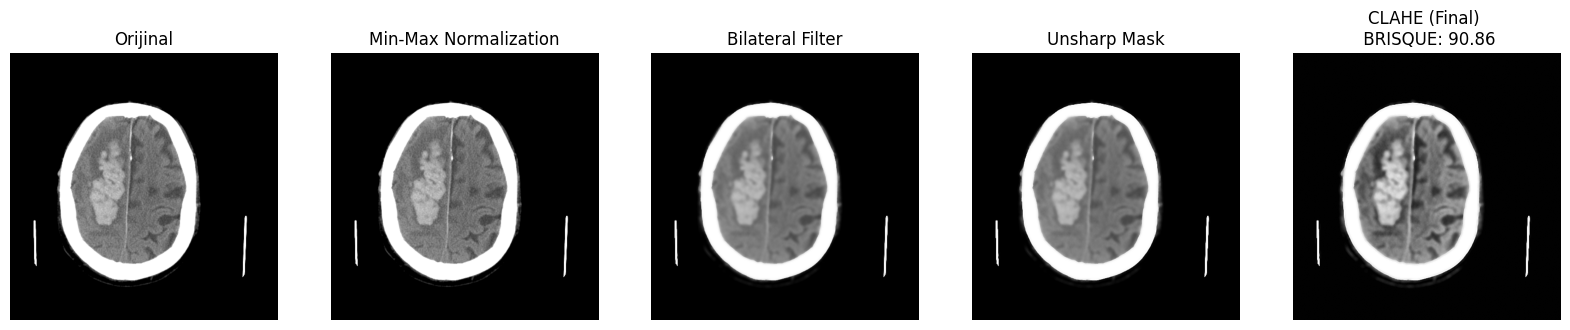

Final image saved to: /content/deneme_cikti/output_image_pipeline1.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar (0 = en iyi, 100 = en kötü kalite).
    """
    # Convert the grayscale image to RGB before passing it to brisque.score
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # Pass the RGB image
    return score

def pipeline_1(image_path, output_path):
    """
    Pipeline 1: Min-Max Normalization → Bilateral Filter → Unsharp Mask → CLAHE
    (Her adımın çıktısı bir sonraki adımın girdisi olur.)
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # 1️⃣ Min-Max Normalization
    image_norm = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # 2️⃣ Bilateral Filter (Normalized → Denoised)
    image_denoised = cv2.bilateralFilter(image_norm.astype(np.uint8), 9, 75, 75)

    # 3️⃣ Unsharp Mask (Denoised → Sharpened)
    image_blurred = cv2.GaussianBlur(image_denoised, (5, 5), sigmaX=1)
    image_sharpened = cv2.addWeighted(image_denoised, 1.5, image_blurred, -0.5, 0)

    # 4️⃣ CLAHE (Sharpened → CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_enhanced = clahe.apply(image_sharpened)

    # 5️⃣ BRISQUE Skorunu Hesapla
    pipeline1_score = evaluate_pipeline(image_enhanced, "Pipeline 1")

    # 📌 Sonuçları Görselleştir (Aşamalar)
    images = [image, image_norm, image_denoised, image_sharpened, image_enhanced]
    titles = ["Orijinal", "Min-Max Normalization", "Bilateral Filter", "Unsharp Mask", f"CLAHE (Final) \n BRISQUE: {pipeline1_score:.2f}"]

    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    # Kaydedilecek klasörü oluştur
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Son çıktıyı kaydet
    output_file_path = os.path.join(output_path, 'output_image_pipeline1.png')
    cv2.imwrite(output_file_path, image_enhanced)
    print(f"Final image saved to: {output_file_path}")

if __name__ == "__main__":
    input_path = "/content/deneme/ID_0b9c158b0.png"
    output_path ="/content/deneme_cikti"
    pipeline_1(input_path, output_path)

##PİPELİNE 2


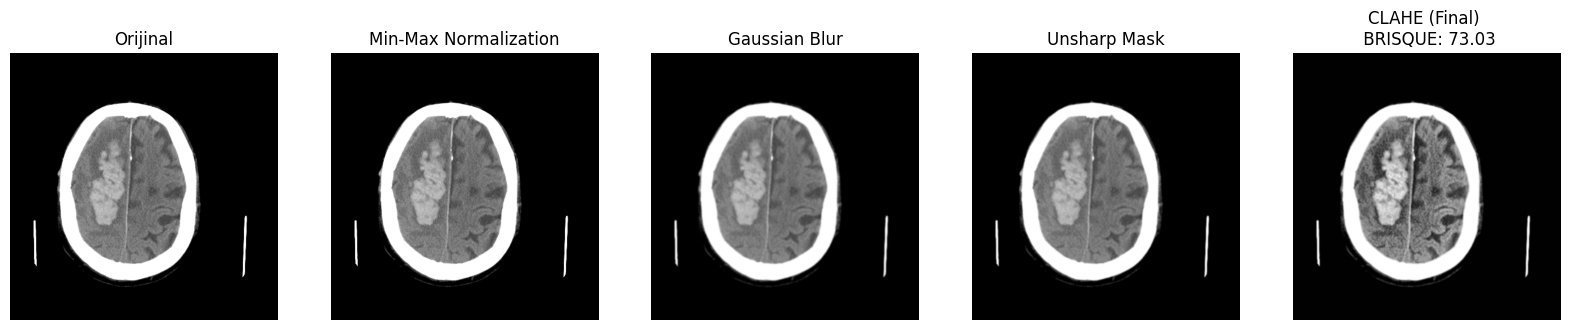

Final image saved to: /content/deneme_cikti/output_image.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar (0 = en iyi, 100 = en kötü kalite).
    """
    # Convert the grayscale image to RGB before passing it to brisque.score
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # Pass the RGB image
    return score

def pipeline_2(image_path, output_path):
    """
    Pipeline 2: Min-Max Normalization → Gaussian Blur → Unsharp Mask → CLAHE
    (Her adımın çıktısı bir sonraki adımın girdisi olur.)
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # 1️⃣ Min-Max Normalization
    image_norm = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # 2️⃣ Gaussian Blur (Normalized → Blurred)
    image_blurred = cv2.GaussianBlur(image_norm, (5, 5), sigmaX=1)

    # 3️⃣ Unsharp Mask (Blurred → Sharpened)
    image_sharpened = cv2.addWeighted(image_blurred, 1.5, cv2.GaussianBlur(image_blurred, (5, 5), sigmaX=1), -0.5, 0)

    # 4️⃣ CLAHE (Sharpened → CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_enhanced = clahe.apply(image_sharpened)

    # 5️⃣ BRISQUE Skorunu Hesapla
    pipeline2_score = evaluate_pipeline(image_enhanced, "Pipeline 2")

    # 📌 Sonuçları Görselleştir (Aşamalar)
    images = [image, image_norm, image_blurred, image_sharpened, image_enhanced]
    titles = ["Orijinal", "Min-Max Normalization", "Gaussian Blur", "Unsharp Mask", f"CLAHE (Final) \n BRISQUE: {pipeline2_score:.2f}"]

    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    # Kaydedilecek klasörü oluştur
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Son çıktıyı kaydet
    output_file_path = os.path.join(output_path, 'output_image.png')
    cv2.imwrite(output_file_path, image_enhanced)
    print(f"Final image saved to: {output_file_path}")

if __name__ == "__main__":
    input_path = "/content/deneme/ID_0b9c158b0.png"
    output_path = "/content/deneme_cikti" # This should be a directory
    pipeline_2(input_path, output_path)


##PİPELİNE 3

Pipeline 3 - BRISQUE Skoru: 100.00


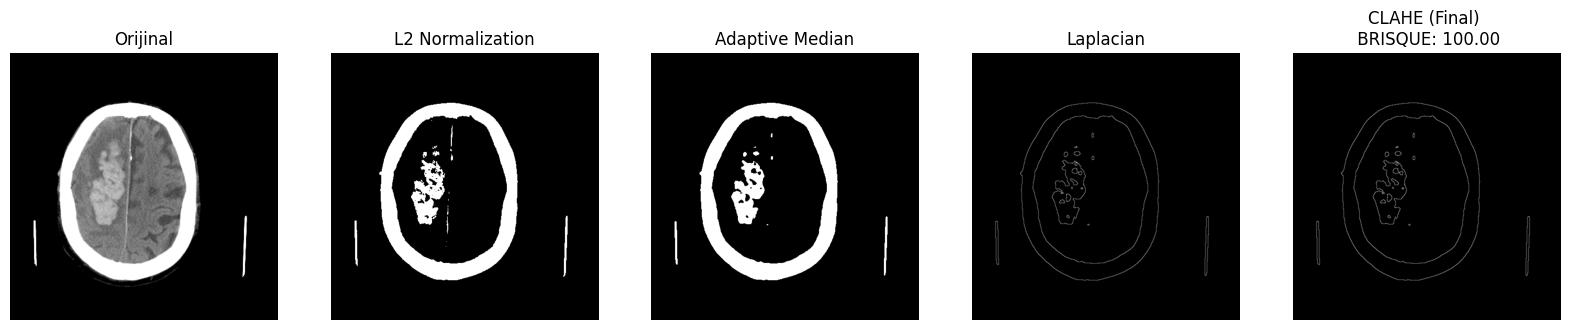

Final image saved to: /content/deneme_cikti/output_image_pipeline3.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar ve 0 ile 100 arasında normalize eder.
    """
    # Gri seviyeli görüntüyü RGB formatına dönüştür
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # BRISQUE skoru hesapla

    # Skoru 0-100 aralığında normalize et (Eğer kütüphane zaten 0-100 aralığında sonuç veriyorsa gerek yoktur)
    score = max(0, min(score, 100))  # Eğer skorun bazı uç değerleri varsa, bu satır skoru sınırlar

    print(f"{pipeline_name} - BRISQUE Skoru: {score:.2f}")  # Skoru ekrana yazdır
    return score

# ... (Rest of your code remains the same)
def pipeline_3(image_path, output_path):
    """
    Pipeline 3: L2 Normalization → Adaptive Median → Laplacian → CLAHE
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # 1️⃣ L2 Normalization
    image_norm = image / (np.linalg.norm(image, ord=2, axis=None) + 1e-8)
    image_norm = (image_norm * 255).astype(np.uint8)

    # 2️⃣ Adaptive Median Filtering
    image_filtered = cv2.medianBlur(image_norm, 5)

    # 3️⃣ Laplacian
    image_laplacian = np.abs(cv2.Laplacian(image_filtered, cv2.CV_64F))
    image_laplacian = (image_laplacian / image_laplacian.max() * 255).astype(np.uint8)

    # 4️⃣ CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_enhanced = clahe.apply(image_laplacian)

    # 5️⃣ BRISQUE Skorunu Hesapla
    pipeline3_score = evaluate_pipeline(image_enhanced, "Pipeline 3")

    # 📌 Sonuçları Görselleştir
    images = [image, image_norm, image_filtered, image_laplacian, image_enhanced]
    titles = ["Orijinal", "L2 Normalization", "Adaptive Median", "Laplacian", f"CLAHE (Final) \n BRISQUE: {pipeline3_score:.2f}"]

    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    # Çıktıyı kaydet
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    output_file_path = os.path.join(output_path, 'output_image_pipeline3.png')
    cv2.imwrite(output_file_path, image_enhanced)
    print(f"Final image saved to: {output_file_path}")

if __name__ == "__main__":
    input_path = "/content/deneme/ID_0b9c158b0.png"
    output_path = "/content/deneme_cikti"
    pipeline_3(input_path, output_path)


##PİPELİNE 4

Pipeline 3 - BRISQUE Skoru: 100.00


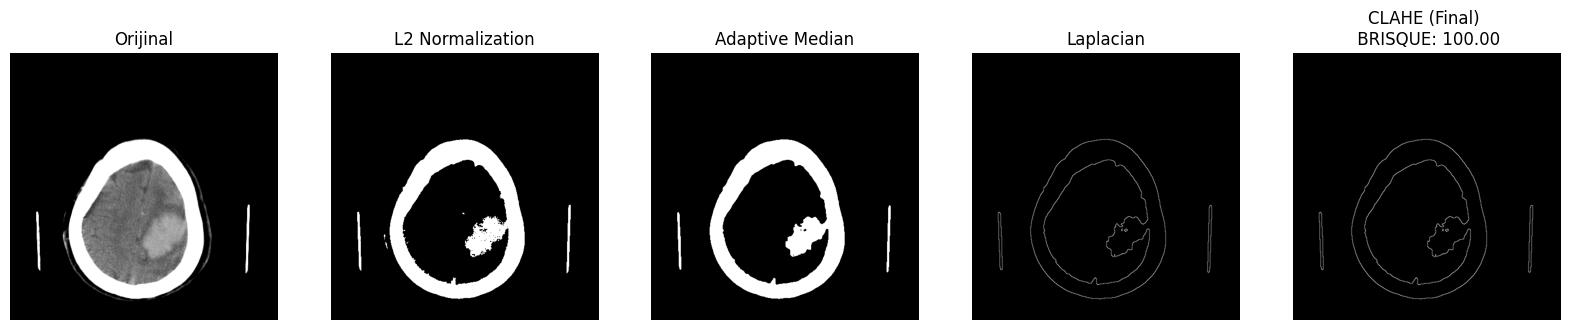

Final image saved to: /content/deneme_cikti/output_image_pipeline3.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar (0 = en iyi kalite, 100 = en kötü kalite).
    """
    # Gri tonlu görüntüyü RGB formatına çevir
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # BRISQUE skoru hesapla

    # **0-100 Aralığında Normalize Et**
    score = max(0, min(score, 100))  # Eğer skor 0'dan küçük veya 100'den büyükse sınırla

    print(f"{pipeline_name} - BRISQUE Skoru: {score:.2f}")  # Konsola yazdır
    return score

def pipeline_3(image_path, output_path):
    """
    Pipeline 3: L2 Normalization → Adaptive Median → Laplacian → CLAHE
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # 1️⃣ L2 Normalization
    image_norm = image / (np.linalg.norm(image, ord=2, axis=None) + 1e-8)
    image_norm = (image_norm * 255).astype(np.uint8)

    # 2️⃣ Adaptive Median Filtering
    image_filtered = cv2.medianBlur(image_norm, 5)

    # 3️⃣ Laplacian
    image_laplacian = np.abs(cv2.Laplacian(image_filtered, cv2.CV_64F))
    image_laplacian = (image_laplacian / image_laplacian.max() * 255).astype(np.uint8)

    # 4️⃣ CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_enhanced = clahe.apply(image_laplacian)

    # 5️⃣ BRISQUE Skorunu Hesapla
    pipeline3_score = evaluate_pipeline(image_enhanced, "Pipeline 3")

    # 📌 Sonuçları Görselleştir
    images = [image, image_norm, image_filtered, image_laplacian, image_enhanced]
    titles = ["Orijinal", "L2 Normalization", "Adaptive Median", "Laplacian", f"CLAHE (Final) \n BRISQUE: {pipeline3_score:.2f}"]

    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    # Çıktıyı kaydet
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    output_file_path = os.path.join(output_path, 'output_image_pipeline3.png')
    cv2.imwrite(output_file_path, image_enhanced)
    print(f"Final image saved to: {output_file_path}")

if __name__ == "__main__":
    input_path = "/content/deneme/ID_00f77e073.png"
    output_path = "/content/deneme_cikti"
    pipeline_3(input_path, output_path)


##PİPELİNE 5

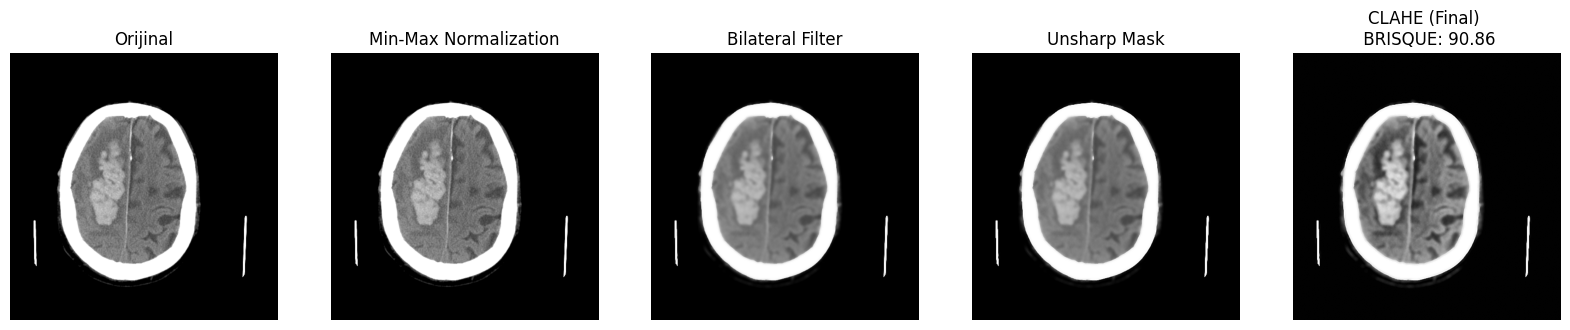

Final image saved to: /content/deneme_cikti/output_image_pipeline5.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar (0 = en iyi, 100 = en kötü kalite).
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to RGB
    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # Pass the RGB image
    return score

def pipeline_5(image_path, output_path):
    """
    Pipeline 5: Min-Max Normalization → Bilateral Filter → Unsharp Mask → CLAHE
    (Her adımın çıktısı bir sonraki adımın girdisi olur.)
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # 1️⃣ Min-Max Normalization
    image_norm = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # 2️⃣ Bilateral Filter (Normalized → Denoised)
    image_denoised = cv2.bilateralFilter(image_norm.astype(np.uint8), 9, 75, 75)

    # 3️⃣ Unsharp Mask (Denoised → Sharpened)
    image_blurred = cv2.GaussianBlur(image_denoised, (5, 5), sigmaX=1)
    image_sharpened = cv2.addWeighted(image_denoised, 1.5, image_blurred, -0.5, 0)

    # 4️⃣ CLAHE (Sharpened → CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_enhanced = clahe.apply(image_sharpened)

    # 5️⃣ BRISQUE Skorunu Hesapla
    pipeline5_score = evaluate_pipeline(image_enhanced, "Pipeline 5")

    # 📌 Sonuçları Görselleştir (Aşamalar)
    images = [image, image_norm, image_denoised, image_sharpened, image_enhanced]
    titles = ["Orijinal", "Min-Max Normalization", "Bilateral Filter", "Unsharp Mask", f"CLAHE (Final) \n BRISQUE: {pipeline5_score:.2f}"]

    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    # Kaydedilecek klasörü oluştur
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Son çıktıyı kaydet
    output_file_path = os.path.join(output_path, 'output_image_pipeline5.png')
    cv2.imwrite(output_file_path, image_enhanced)
    print(f"Final image saved to: {output_file_path}")

if __name__ == "__main__":
    input_path = "/content/deneme/ID_0b9c158b0.png"
    output_path = "/content/deneme_cikti"
    pipeline_5(input_path, output_path)


##PİPELİNE 6

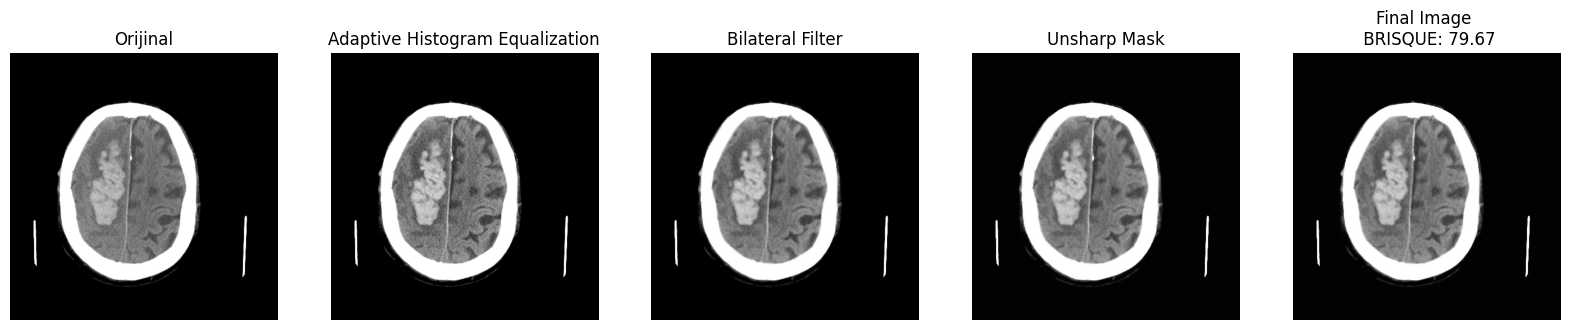

Final image saved to: /content/deneme_cikti/output_image_pipeline6.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar (0 = en iyi, 100 = en kötü kalite).
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to RGB
    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # Pass the RGB image
    return score

def pipeline_6(image_path, output_path):
    """
    Pipeline 6: Adaptive Histogram Equalization → Bilateral Filter → Unsharp Mask (Optimize Edilmiş)
    (Her adımın çıktısı bir sonraki adımın girdisi olur.)
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # 1️⃣ Adaptive Histogram Equalization (Contrast Enhancement)
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
    image_clahe = clahe.apply(image)

    # 2️⃣ Bilateral Filter (Noise Reduction)
    image_denoised = cv2.bilateralFilter(image_clahe, 5, 50, 50)

    # 3️⃣ Unsharp Mask (Sharpening)
    image_blurred = cv2.GaussianBlur(image_denoised, (3, 3), sigmaX=1)
    image_sharpened = cv2.addWeighted(image_denoised, 1.2, image_blurred, -0.2, 0)

    # 4️⃣ Final Image (Avoid Over-Enhancement)
    image_final = image_sharpened

    # 5️⃣ BRISQUE Score Calculation
    pipeline6_score = evaluate_pipeline(image_final, "Pipeline 6 (Optimize)")

    # 📌 Visualization
    images = [image, image_clahe, image_denoised, image_sharpened, image_final]
    titles = ["Orijinal", "Adaptive Histogram Equalization", "Bilateral Filter", "Unsharp Mask", f"Final Image \n BRISQUE: {pipeline6_score:.2f}"]

    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save final output
    output_file_path = os.path.join(output_path, 'output_image_pipeline6.png')
    cv2.imwrite(output_file_path, image_final)
    print(f"Final image saved to: {output_file_path}")

if __name__ == "__main__":
    input_path = "/content/deneme/ID_0b9c158b0.png"
    output_path = "/content/deneme_cikti"
    pipeline_6(input_path, output_path)



##PİPELİNE 7

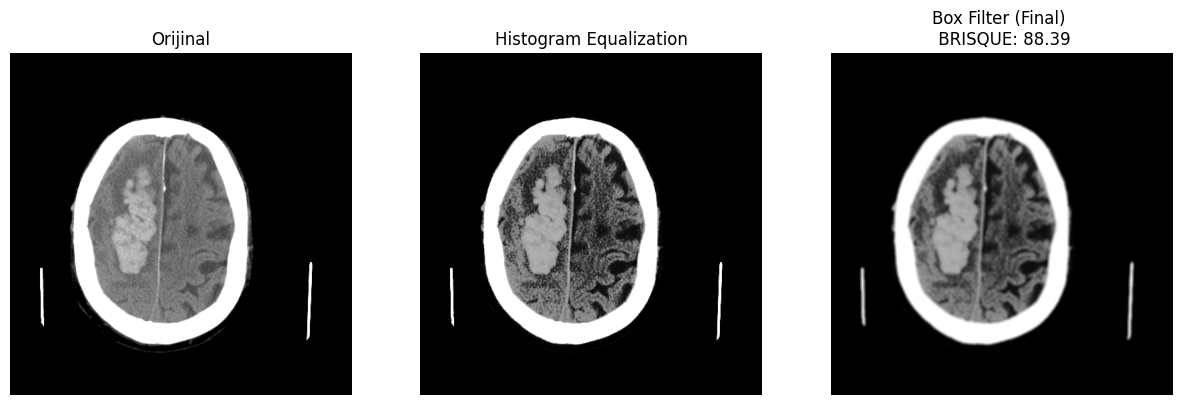

Final image saved to: /content/deneme_cikti/output_image_pipeline7.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar (0 = en iyi, 100 = en kötü kalite).
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to RGB
    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # Pass the RGB image
    return score

def pipeline_7(image_path, output_path):
    """
    Pipeline 7: Histogram Equalization → Box Filter
    (Her adımın çıktısı bir sonraki adımın girdisi olur.)
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # 1️⃣ Histogram Equalization (Contrast Enhancement)
    image_hist_eq = cv2.equalizeHist(image)

    # 2️⃣ Box Filter (Noise Reduction & Smoothing)
    image_filtered = cv2.blur(image_hist_eq, (5,5))

    # 3️⃣ BRISQUE Score Calculation
    pipeline7_score = evaluate_pipeline(image_filtered, "Pipeline 7")

    # 📌 Visualization
    images = [image, image_hist_eq, image_filtered]
    titles = ["Orijinal", "Histogram Equalization", f"Box Filter (Final) \n BRISQUE: {pipeline7_score:.2f}"]

    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save final output
    output_file_path = os.path.join(output_path, 'output_image_pipeline7.png')
    cv2.imwrite(output_file_path, image_filtered)
    print(f"Final image saved to: {output_file_path}")


if __name__ == "__main__":
    input_path = "/content/deneme/ID_0b9c158b0.png"
    output_path = "/content/deneme_cikti"
    pipeline_7(input_path, output_path)


##PİPELİNE 8

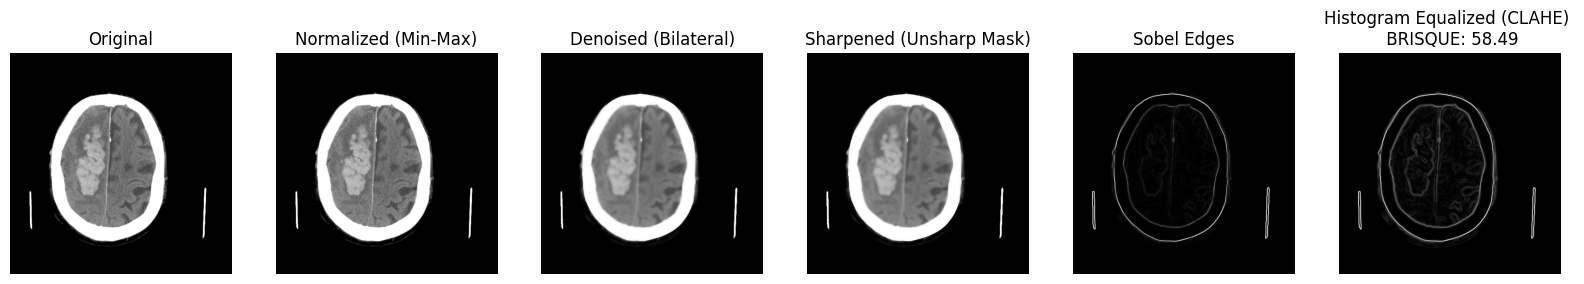

Final image saved to: /content/deneme_cikti/output_image_pipeline8.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar (0 = en iyi, 100 = en kötü kalite).
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to RGB
    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # Pass the RGB image
    return score

def pipeline_8(image_path, output_path):
    """
    Pipeline 8: Min-Max Normalization → Bilateral Filter → Unsharp Mask → Sobel Edges → CLAHE
    HOG & CoHOG vektörleri için optimize edilmiştir.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    images = [image]  # İşlem adımları için liste

    # 1️⃣ Min-Max Normalization
    image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    images.append(image)

    # 2️⃣ Bilateral Filtering (Noise Reduction - Edge Preservation)
    image = cv2.bilateralFilter(image, 9, 75, 75)
    images.append(image)

    # 3️⃣ Unsharp Mask (Sharpening - Enhancing Edges)
    blurred = cv2.GaussianBlur(image, (5, 5), sigmaX=1)
    image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    images.append(image)

    # 4️⃣ Sobel Filters (Edge Detection for HOG Features)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    image = np.sqrt(sobel_x**2 + sobel_y**2)
    image = np.uint8(255 * image / np.max(image))  # Normalize
    images.append(image)

    # 5️⃣ CLAHE (Contrast Enhancement for HOG Features)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image = clahe.apply(image)
    images.append(image)

    # 6️⃣ BRISQUE Score Calculation
    pipeline8_score = evaluate_pipeline(image, "Pipeline 8")

    # 📌 Visualization
    titles = [
        "Original", "Normalized (Min-Max)", "Denoised (Bilateral)",
        "Sharpened (Unsharp Mask)", "Sobel Edges", f"Histogram Equalized (CLAHE) \n BRISQUE: {pipeline8_score:.2f}"
    ]

    plt.figure(figsize=(20, 5))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save final output
    output_file_path = os.path.join(output_path, 'output_image_pipeline8.png')
    cv2.imwrite(output_file_path, image)
    print(f"Final image saved to: {output_file_path}")

if __name__ == "__main__":
    input_path = "/content/deneme/ID_0b9c158b0.png"
    output_path = "/content/deneme_cikti"
    pipeline_8(input_path, output_path)







##EN İYİ PİPELİNE UYGULAMASI###




##**Pipeline 2:** İlk olarak, piksel değerleri 0-255 arasında ölçeklendirilerek kontrast normalleştirilir (Min-Max Normalization). Daha sonra, Gaussian Blur ile gürültü azaltılır ve Unsharp Mask yöntemiyle görüntü keskinleştirilir. Son olarak, CLAHE algoritması kullanılarak yerel kontrast artırılır ve ayrıntılar vurgulanır. İşlenmiş görüntünün kalitesi, BRISQUE metriği ile değerlendirilir ve sonuçlar kaydedilir.

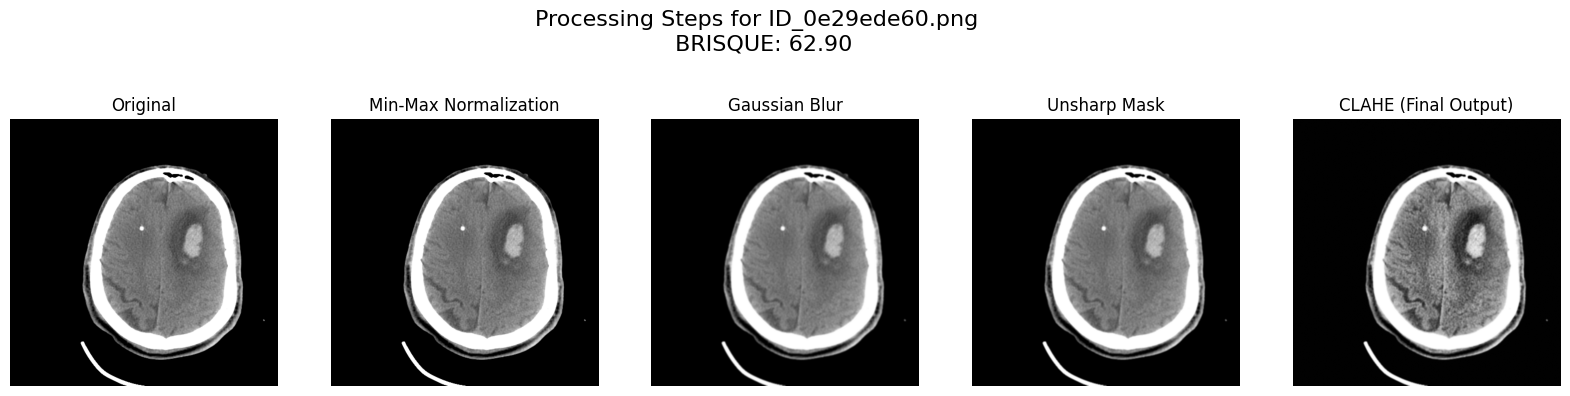

Final image saved to: /content/onisleme_cikti/ID_0e29ede60.png


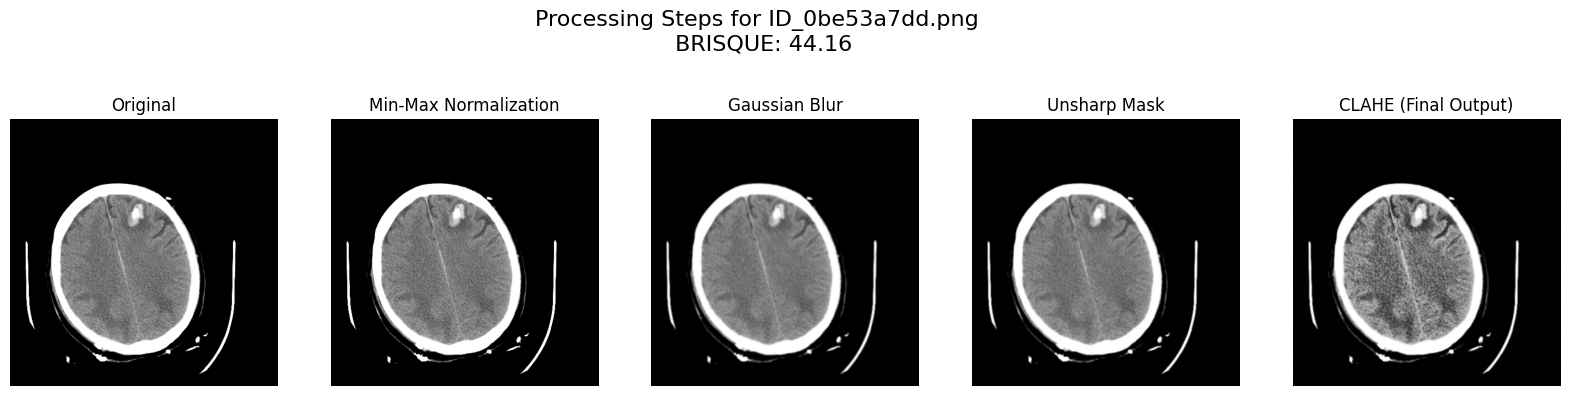

Final image saved to: /content/onisleme_cikti/ID_0be53a7dd.png


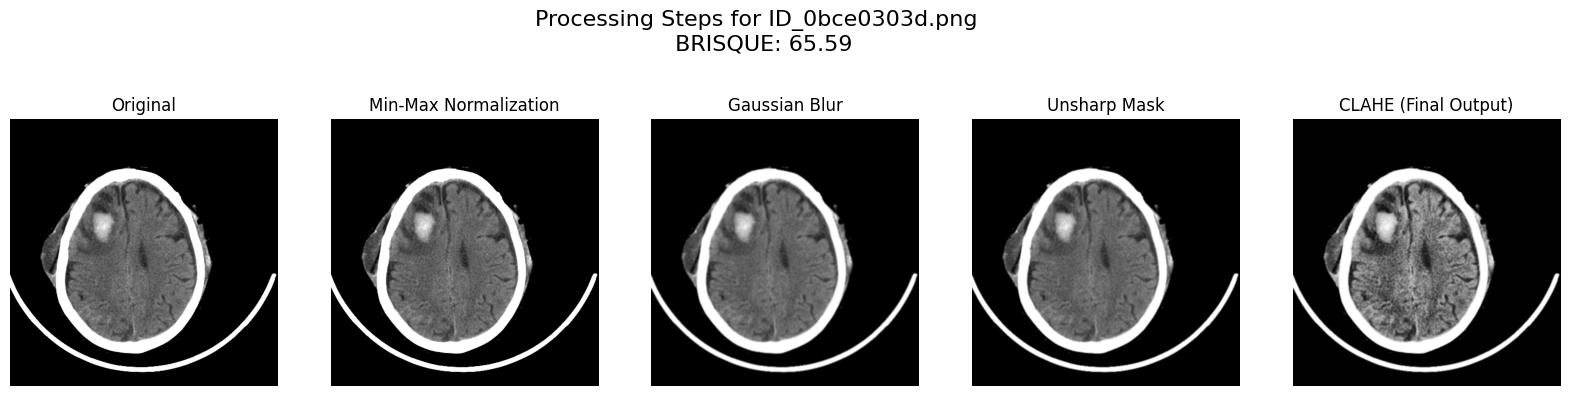

Final image saved to: /content/onisleme_cikti/ID_0bce0303d.png


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from brisque import BRISQUE  # BRISQUE hesaplaması için gerekli kütüphane

def evaluate_pipeline(image, pipeline_name):
    """
    BRISQUE skorunu hesaplar (0 = en iyi, 100 = en kötü kalite).
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to RGB
    brisque = BRISQUE()
    score = brisque.score(image_rgb)  # Pass the RGB image
    return score

def pipeline_2(image):
    """
    Pipeline 2: Min-Max Normalization → Gaussian Blur → Unsharp Mask → CLAHE
    (Her adımın çıktısı bir sonraki adımın girdisi olur.)
    """
    # Min-Max Normalization
    normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

    # Gaussian Blur (Normalized → Blurred)
    blurred = cv2.GaussianBlur(normalized, (5, 5), 1)

    # Unsharp Mask (Blurred → Sharpened)
    sharpened = cv2.addWeighted(blurred, 1.5, cv2.GaussianBlur(blurred, (5, 5), 1), -0.5, 0)

    # CLAHE (Sharpened → CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(sharpened)

    return [
        ("Original", image),
        ("Min-Max Normalization", normalized),
        ("Gaussian Blur", blurred),
        ("Unsharp Mask", sharpened),
        ("CLAHE (Final Output)", enhanced)
    ]

def process_image(image_path, output_folder):
    """
    Process a single image using Pipeline 2 and save/display results.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Apply Pipeline 2
    results = pipeline_2(image)
    final_image = results[-1][1]

    # Calculate BRISQUE Score
    pipeline2_score = evaluate_pipeline(final_image, "Pipeline 2")

    # Display Results
    plt.figure(figsize=(20, 5))
    for i, (title, img) in enumerate(results):
        plt.subplot(1, len(results), i + 1)
        plt.title(title)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Processing Steps for {os.path.basename(image_path)} \n BRISQUE: {pipeline2_score:.2f}", fontsize=16)
    plt.show()

    # Save the final result
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_path, final_image)
    print(f"Final image saved to: {output_path}")

def process_folder(input_folder, output_folder):
    """
    Process all images in the input folder using Pipeline 2.
    """
    if not os.path.exists(input_folder):
        print(f"Input folder {input_folder} does not exist.")
        return

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tif'))]
    if not image_files:
        print(f"No images found in the folder: {input_folder}")
        return

    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)
        process_image(image_path, output_folder)

if __name__ == "__main__":
    input_folder = "/content/onisleme_uygulama"
    output_folder = "/content/onisleme_cikti"
    process_folder(input_folder, output_folder)
